In [1]:
import spacy
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
nlp = spacy.load('./data/embeddings_disc/')

In [2]:
data = pd.read_csv('../datos/entrenamiento_modelos_categorias/tweets_entrenamiento_genero_balance_ligth.csv')

In [3]:
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,full_text,categoria_1-ap,categoria_2-dis,categoria_3-ed,label,categoria_5-id,categoria_6-or,categoria_7-rel
0,609535,439353,256490,gente viviendo 3000 mejor puto trabajando,0,0,0,0,0,1,0
1,539725,369543,427176,contesta,0,0,0,0,0,0,0
2,513700,343518,656368,[] asi abandonando edificios identidad ayto ma...,0,0,0,0,0,0,0
3,289679,119497,370744,tambien podemos cancelar conlosninosconcancerno,0,0,0,0,0,0,0
4,215960,45778,323494,extrano puto,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
136141,371801,201619,940464,ps,0,0,0,0,0,0,0
136142,246435,76253,24845,naco senalar alguien naco decir palabra naco,1,0,0,0,0,0,0
136143,39025,90633,91570,darianka deja comentarle fotos jaden puta,0,0,0,1,0,0,0
136144,380028,209846,1030195,nomas antojas,0,0,0,0,0,0,0


In [4]:
train, test = train_test_split(data, test_size=0.2,random_state = 202008)

In [5]:
npEmbeddings2 = np.empty([0, 300])
for texto in test['full_text']:
    
    #print(frase)
    
    # process a sentence using the model
    doc = nlp(texto)
    
    # print(doc.vector.shape)
    #print(npEmbeddings.shape)
    #print(doc.vector.shape)
    
    if doc.vector.shape[0]==300:
        npEmbeddings2 = np.append(npEmbeddings2, [doc.vector], axis = 0)
    else:
        npAux = np.empty([1, 300])
        doc = nlp('prueba')
        #npEmbeddings = np.append(npEmbeddings, npAux, axis = 0)
        npEmbeddings2 = np.append(npEmbeddings2, [doc.vector], axis = 0)
        predicted_svm = clf.predict([doc.vector])
        
npEmbeddings2.shape

(27230, 300)

In [6]:
import pickle as pickle

pickleFile = open('../modelos/modelo_capa2_genero.p', 'rb')
best_model = pickle.load(pickleFile)
pickleFile.close()

In [7]:
y_probas = best_model.predict_proba(npEmbeddings2)
y_true = test['label']
y_prob = pd.DataFrame(y_probas)
y_prob.columns = ["cero","uno"]
y_prob = y_prob["uno"] 

In [8]:
y_prob = best_model.predict(npEmbeddings2)
confusion_matrix(y_true, y_prob)

array([[20387,   119],
       [  567,  6157]])

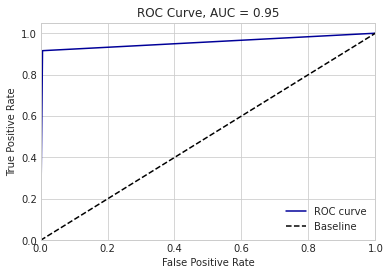

In [9]:
#Definimos la funcion que graficará la ROC
def plot_ROC(test_labels, test_predictions):
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, 
                                             test_predictions, pos_label=1)
    auc = "%.2f" % metrics.auc(fpr, tpr)
    title = 'ROC Curve, AUC = '+str(auc)
    with plt.style.context(('seaborn-whitegrid')):
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr, "#000099", label='ROC curve')
        ax.plot([0, 1], [0, 1], 'k--', label='Baseline')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.title(title)
    return  
plot_ROC(y_true, y_prob) 

In [10]:
metrics.f1_score(y_true, y_prob)

0.9472307692307692

In [11]:
metrics.recall_score(y_true, y_prob)

0.9156751933372992